In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import re

In [2]:
# Loading scraped dataset of around 3150 tweets
# Scraper: https://www.vicinitas.io/free-tools/download-user-tweets
tweet_df = pd.read_csv('D:\LUMS\Year 3\Fall 2022\CS 535\Project\Raw data\davidguetta_3000tweets.csv')

<AxesSubplot:xlabel='Tweet Type', ylabel='count'>

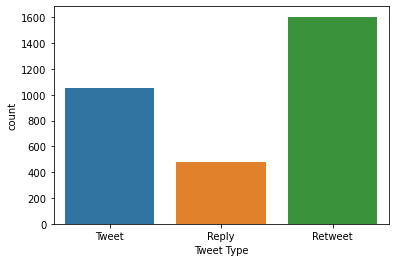

In [3]:
sns.countplot(x = 'Tweet Type', data = tweet_df)

In [4]:
# Removing tweets not in english
print(tweet_df.shape)
tweet_df.drop(tweet_df.loc[tweet_df['Language'] != 'en'].index, inplace=True)
print(tweet_df.shape)

(3138, 19)
(2381, 19)


In [5]:
# Only selecting text and tweet type
df  = pd.DataFrame(tweet_df[['Text','Tweet Type']])

In [6]:
# Removing retweets
df.drop(df.loc[df['Tweet Type'] == 'Retweet'].index, inplace=True)

<AxesSubplot:xlabel='Tweet Type', ylabel='count'>

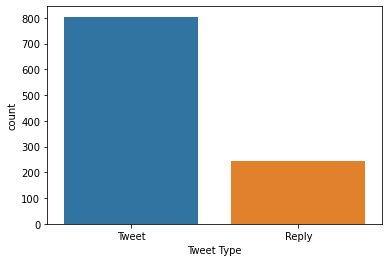

In [7]:
sns.countplot(x = 'Tweet Type', data = df)

In [8]:
print(df.shape)
# Removing Tweet Type column
del df['Tweet Type']

# Selecting first 1000 tweets
df = df[:1000]

(1048, 2)


In [9]:
# Saving to CSV File
filepath = 'D:/LUMS/Year 3/Fall 2022/CS 535/Project/davidguetta_task1.csv'
df.to_csv(filepath,index=False)  

In [10]:
# Reading from CSV File
task2 = pd.read_csv('D:/LUMS/Year 3/Fall 2022/CS 535/Project/davidguetta_task1.csv')

In [11]:
# First 10 tweets before processing
task2.head(10)

,Text
0,Pursuit of Happiness vs. Ain�t A Party vs. Bad...
1,24 hours before the NRJ Music Awards and from ...
2,@PopCulture2000s This song is almost 12 years ...
3,BEST COLLAB FOR I�M GOOD AT MTV EMA!!!!! @bebe...
4,This is how I opened the @mtvema 2022 together...
5,"Yoooooooouuuuu, Yooooooouuuu� WITHOUUUUUUUUT: ..."
6,Memories are back ??\n\nBack in the studio wit...
7,?? DAMN ?? My collab with @wearegalantis &amp;...
8,Let�s be together again� \n\n�Together� from o...
9,You will love the atmosphere of �Solar� from o...


In [12]:
def punc_rem(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

def token(text):
    text = re.split('\W+', text)
    return text

stopword = ['ourselves', 'hers', 'between', 'yourself', 'but', 'again', 'there', 'about', 'once', 
             'during', 'out', 'very', 'having', 'with', 'they', 'own', 'an', 'be', 'some','for', 'do', 'its', 'yours', 
             'such', 'into', 'of', 'most', 'itself', 'other', 'off', 'is', 's', 'am', 'or', 'who', 'as', 'from', 'him', 
             'each', 'the', 'themselves', 'until', 'below', 'are', 'we', 'these', 'your', 'his', 'through', 'don', 'nor', 
             'me', 'were', 'her', 'more', 'himself', 'this', 'down', 'should', 'our', 'their', 'while', 'above', 'both', 'up', 
             'to', 'ours', 'had', 'she', 'all', 'no', 'when', 'at', 'any', 'before', 'them', 'same', 'and', 'been', 'have', 
             'in', 'will', 'on', 'does', 'yourselves', 'then', 'that', 'because', 'what', 'over', 'why', 'so', 'can', 'did', 
             'not', 'now', 'under', 'he', 'you', 'herself', 'has', 'just', 'where', 'too', 'only', 'myself', 'which', 'those', 
             'i', 'after', 'few', 'whom', 't', 'being', 'if', 'theirs', 'my', 'against', 'a', 'by', 'doing', 'it', 'how', 
             'further', 'was', 'here', 'than'] 

def rem_stop(text):
    text = [word for word in text if word not in stopword]
    return text

In [13]:
task2['nopunc'] = task2['Text'].apply(lambda x: punc_rem(x))

In [14]:
task2['Tokenized'] = task2['nopunc'].apply(lambda x: token(x.lower()))

In [15]:
task2['nonstop'] = task2['Tokenized'].apply(lambda x: rem_stop(x))

In [16]:
penultimate = task2['nonstop']

In [17]:
# Removing links, empty strings and single character strings from data
substring = 'http'
result_list = []

for l in penultimate:
    new_list = [item for item in l if substring not in item]
    while("" in new_list):
        new_list.remove("")
    new_list = [i for i in new_list if len(i) > 1]
    result_list.append(new_list)

In [18]:
cleaned = pd.DataFrame()
cleaned['Processed'] = result_list

In [19]:
# Printing first 10 tweets after processing
cleaned.head(10)

,Processed
0,"[pursuit, happiness, vs, ain, party, vs, bad, ..."
1,"[hours, nrj, music, awards, pm, paris, time, v..."
2,"[popcultures, song, almost, years, old]"
3,"[best, collab, good, mtv, ema, beberexha, repo..."
4,"[opened, mtvema, together, beberexha, thanks, ..."
5,"[yoooooooouuuuu, yooooooouuuu, withouuuuuuuut,..."
6,"[memories, back, back, studio, kidcudi]"
7,"[damn, collab, wearegalantis, amp, mnek]"
8,"[let, together, together, futureraveoff, ep, m..."
9,"[love, atmosphere, solar, futureraveoff, ep, t..."


In [20]:
# Making a CSV
filepath = 'D:/LUMS/Year 3/Fall 2022/CS 535/Project/davidguetta_task2.csv'
cleaned.to_csv(filepath,index=False)  

In [21]:
n = len(result_list)
splitmark = int(n*0.8)

train = result_list[:splitmark]
test = result_list[splitmark:]

In [22]:
def make_vocab(tweet_list):
    distinct = set()
    for row in tweet_list:
        for element in row:
            distinct.add(element)
        
    return distinct

In [23]:
# Making vocbulary using train tweets
vocab = make_vocab(train)
vocab = list(vocab)
print(vocab)

['whatsapp', 'help', 'techno', 'head', 'encorebeachclub', 'musicbybrooks', 'xiaomifrance', 'taramcdonaldtv', 'ximos', 'zaralarsson', 'ones', 'cant', 'beatport', 'share', 'gooo', 'thankful', 'staystrong', 'black', 'properly', 'nfts', 'tucker', 'twitch', 'yourlove', 'edition', 'looking', 'already', 'roccosiffredixx', 'discover', 'danced', 'giving', 'beauty', 'series', 'working', 'throwback', 'january', 'swedish', 'shouseshouse', 'headphone', 'ultraeurope', 'believe', 'feedbacks', 'neyocompound', 'bootlegging', 'adribc', 'houseworkradio', 'vk', 'issue', 'food', 'mine', 'oliveyches', 'willis', 'brings', 'igottafeeling', 'aleccardenas', 'cevinfisher', 'awards', 'th', 'dsawickapl', 'pre', 'partner', 'badges', 'gettin', 'acdc', 'dontleavemealone', 'time', 'forthcoming', 'giphy', 'producers', 'jasonderulo', 'cest', 'south', 'relectronicmusic', 'heading', 'looks', 'shakira', 'closes', 'watching', 'anthems', 'aim', 'element', 'jackback', 'east', 'cook', 'tag', 'exchangela', 'flames', 'storymiami

In [24]:
# Making bag of word for each tweet and appending to list
def make_features(tweet_list,vocab):

    total_bags = []
    for tw in tweet_list:        
        words = tw       
        bag_vector = np.zeros(len(vocab))        
        for w in words:
            for i,word in enumerate(vocab):                
                if word == w:                     
                    bag_vector[i] += 1                   
        total_bags.append(np.array(bag_vector))

    return total_bags

In [25]:
# Train
total_bags = make_features(train,vocab)
total_bags = pd.DataFrame(total_bags)
rows,cols = total_bags.shape
print(rows,cols)
alpha = 1

# Laplace Smoothing to replace zeros

# denominator will be same for all features as all have same y output, i.e davidguetta
denom = rows+cols*alpha
probs = []
for i in range(cols):
    nonzerocount = (total_bags[i] > 0).sum()
    prob = (nonzerocount+alpha)/denom
    # Adding tp probability list for all features for future smoothing of test data
    probs.append(prob)
    total_bags[i].replace(0,prob,inplace=True)
    
total_bags.head(10)

800 1848


,0,1,2,3,4,5,6,7,8,9,...,1838,1839,1840,1841,1842,1843,1844,1845,1846,1847
0,0.000755,0.002266,0.001511,0.002266,0.000755,0.003399,0.001511,0.000755,0.000755,0.001133,...,0.003021,0.001888,0.003021,0.000755,1.000000,0.000755,0.016239,0.001133,0.001133,0.000755
1,0.000755,0.002266,0.001511,0.002266,0.000755,0.003399,0.001511,0.000755,0.000755,0.001133,...,0.003021,0.001888,0.003021,0.000755,0.000755,0.000755,0.016239,0.001133,0.001133,0.000755
2,0.000755,0.002266,0.001511,0.002266,0.000755,0.003399,0.001511,0.000755,0.000755,0.001133,...,0.003021,0.001888,0.003021,0.000755,0.000755,0.000755,0.016239,0.001133,0.001133,0.000755
3,0.000755,0.002266,0.001511,0.002266,0.000755,0.003399,0.001511,0.000755,0.000755,0.001133,...,0.003021,0.001888,0.003021,0.000755,0.000755,0.000755,0.016239,0.001133,0.001133,0.000755
4,0.000755,0.002266,0.001511,0.002266,0.000755,0.003399,0.001511,0.000755,0.000755,0.001133,...,0.003021,0.001888,0.003021,0.000755,0.000755,0.000755,0.016239,0.001133,0.001133,0.000755
5,0.000755,0.002266,0.001511,0.002266,0.000755,0.003399,0.001511,0.000755,0.000755,0.001133,...,0.003021,0.001888,0.003021,0.000755,0.000755,0.000755,0.016239,0.001133,0.001133,0.000755
6,0.000755,0.002266,0.001511,0.002266,0.000755,0.003399,0.001511,0.000755,0.000755,0.001133,...,0.003021,0.001888,0.003021,0.000755,0.000755,0.000755,0.016239,0.001133,0.001133,0.000755
7,0.000755,0.002266,0.001511,0.002266,0.000755,0.003399,0.001511,0.000755,0.000755,0.001133,...,0.003021,0.001888,0.003021,0.000755,0.000755,0.000755,0.016239,0.001133,0.001133,0.000755
8,0.000755,0.002266,0.001511,0.002266,0.000755,0.003399,0.001511,0.000755,0.000755,0.001133,...,0.003021,0.001888,0.003021,0.000755,0.000755,0.000755,0.016239,0.001133,0.001133,0.000755
9,0.000755,0.002266,0.001511,0.002266,0.000755,0.003399,0.001511,0.000755,0.000755,0.001133,...,0.003021,0.001888,0.003021,0.000755,0.000755,0.000755,0.016239,0.001133,0.001133,0.000755


In [26]:
# Test
total_bags = make_features(test,vocab)
total_bags = pd.DataFrame(total_bags)
rows,cols = total_bags.shape
print(rows,cols)
alpha = 1

# Laplace Smoothing to replace zeros

# Using same probabilities as train so that smoothing is consistent. Technically, we do not know y-labels of test.
for i in range(cols):
    prob = probs[i]
    total_bags[i].replace(0,prob,inplace=True)
    
total_bags.head(10)

200 1848


,0,1,2,3,4,5,6,7,8,9,...,1838,1839,1840,1841,1842,1843,1844,1845,1846,1847
0,0.000755,0.002266,0.001511,0.002266,0.000755,0.003399,0.001511,0.000755,0.000755,0.001133,...,0.003021,0.001888,0.003021,0.000755,0.000755,0.000755,0.016239,0.001133,0.001133,0.000755
1,0.000755,0.002266,0.001511,0.002266,0.000755,0.003399,0.001511,0.000755,0.000755,0.001133,...,0.003021,0.001888,0.003021,0.000755,0.000755,0.000755,0.016239,0.001133,0.001133,0.000755
2,0.000755,0.002266,0.001511,0.002266,0.000755,0.003399,0.001511,0.000755,0.000755,0.001133,...,0.003021,0.001888,0.003021,0.000755,0.000755,0.000755,0.016239,0.001133,0.001133,0.000755
3,0.000755,0.002266,0.001511,0.002266,0.000755,0.003399,0.001511,0.000755,0.000755,0.001133,...,0.003021,0.001888,0.003021,0.000755,0.000755,0.000755,0.016239,0.001133,0.001133,0.000755
4,0.000755,0.002266,0.001511,0.002266,0.000755,0.003399,0.001511,0.000755,0.000755,0.001133,...,0.003021,0.001888,0.003021,0.000755,0.000755,0.000755,0.016239,0.001133,0.001133,0.000755
5,0.000755,0.002266,0.001511,0.002266,0.000755,0.003399,0.001511,0.000755,0.000755,0.001133,...,0.003021,0.001888,0.003021,0.000755,0.000755,0.000755,0.016239,0.001133,0.001133,0.000755
6,0.000755,0.002266,0.001511,0.002266,0.000755,0.003399,0.001511,0.000755,0.000755,0.001133,...,0.003021,0.001888,0.003021,0.000755,0.000755,0.000755,0.016239,0.001133,0.001133,0.000755
7,0.000755,0.002266,0.001511,0.002266,0.000755,0.003399,0.001511,0.000755,0.000755,0.001133,...,0.003021,0.001888,0.003021,0.000755,0.000755,0.000755,0.016239,0.001133,0.001133,0.000755
8,0.000755,0.002266,0.001511,0.002266,0.000755,0.003399,0.001511,0.000755,0.000755,0.001133,...,0.003021,0.001888,0.003021,0.000755,0.000755,0.000755,0.016239,0.001133,0.001133,0.000755
9,0.000755,0.002266,0.001511,0.002266,0.000755,0.003399,0.001511,0.000755,0.000755,0.001133,...,0.003021,0.001888,0.003021,0.000755,0.000755,0.000755,0.016239,0.001133,0.001133,0.000755


In [27]:
# Convert to lists if need to add to csv file
y = []
for i in range(rows):
    x = total_bags.loc[i, :].values.tolist()
    y.append(x)